<a href="https://colab.research.google.com/github/Firojpaudel/Machine-Learning-Notes/blob/main/Practical%20Deep%20Learning%20For%20Coders/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a Digit Classifier

In [1]:
#First initializing the notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc("image", cmap="Greys")

### **Lesson 1:** How images are represented in a computer:

For the initial learning, I'm just creating a model that classifies any image as *3 or 7*. Before that, downloading a sample of MNIST that contains images of just these digits

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
## Checking the directory
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [6]:
## Checking what's inside the training set
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

So, yeah! there are images of 7 and 3 in the training set. The images inside these folders are labelled accordingly.

In [7]:
## Taking a look in these folders to check the images.
three = (path/'train'/'3').ls().sorted()
seven= (path/'train'/'7').ls().sorted()

In [8]:
three

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [9]:
seven

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

They are all full of .png files.


In [10]:
## Taking a look at one of them
img3 = Image.open(three[0])
img3

In computer as we know all data is represented as a number, we have to convert the images into an array or tensor before model training.

In [11]:
## Converting to array
array(img3)

'''
This is similar to doing:
array = np.array(img3)
array

'''

'\nThis is similar to doing:\narray = np.array(img3)\narray\n\n'

In [12]:
#@ Side learnings:
#@ If we wish to see the array from particular index in both rows and columns, we could do like:
np.array(img3)[4:10,4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [13]:
## Now, in pytorch, it's kinda different. We have tensors instead of arrays
tensor(img3)[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

Also, we could do sth like color coding in pandas.

In [14]:
#@ Visualizing in pandas
df= pd.DataFrame(tensor(img3)[3:13, 9:19])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,42,118,219,166,118,118,6,0
2,0,103,242,254,254,254,254,254,66,0
3,0,18,232,254,254,254,254,254,238,70
4,0,0,104,244,254,224,254,254,254,141
5,0,0,0,207,254,210,254,254,254,34
6,0,0,0,84,206,254,254,254,254,41
7,0,0,0,0,24,209,254,254,254,171
8,0,0,0,91,137,253,254,254,254,112
9,0,40,214,250,254,254,254,254,254,34


### **First Try:** Pixel Similarity


* Step1: Would be to get the average of pixel values for each of our two groups

In [15]:
#@ Creating tensors containg a single image
seven_tensors = [tensor(Image.open(o)) for o in seven]
three_tensors = [tensor(Image.open(o)) for o in three]

#@ Checking the lengths of these created tensors
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

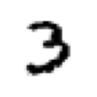

In [16]:
#! Just checking the tensor:
show_image(three_tensors[4])

In [17]:
#@ Now stacking
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

#@ Checking the Shape
stacked_threes.shape

torch.Size([6131, 28, 28])

**The meaning of this output:**<br>
It's trying to say that we have 6,131 images, each of size 28×28 pixels.


<details>
  <summary>
    <b>The reason behind converting to float and dividing by 255</b>
  </summary>
- Some of the operations in PyTorch, such as taking means, require us to cast our integer types into float types. So, converting the stacks to float as well.<br>
- When converted to float, the pixel values are also expected to be in between 0 to 1. So dividing by 255.  
</details>

In [18]:
#@ Gettig the rank of the tensor
len(stacked_threes.shape)

'''
This is similar to doing:
stacked_threes.shape
'''


'\nThis is similar to doing:\nstacked_threes.shape\n'

##### **Ranks defined**:
\- Here's what the rank of tensors mean:
  - **Rank 0**= Scalar, *real number or constant*
  - **Rank 1**= Vector, *can be represente as list of values*
  - **Rank 2**= Matrix, *to represent 2D data structures*
  - **Rank 3**= 3D Tensor, *cube or stack of matrices*
  - **Rank 4**= 4D Tensor, *to represent images in batch form: where the 4th dimension reprents the batch size*




<Axes: >

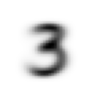

In [19]:
#@ Now computing the mean and looking at what we should be expecting for peak image for 3 (for classification)
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

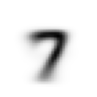

In [20]:
#@ Doing the same for seven
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

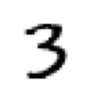

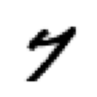

In [21]:
## Just picking an arbitary 3s or 7s and seeing how far are we from the "ideal digits"
arb_3 = stacked_threes[1]
show_image(arb_3)

arb_7 = stacked_sevens[1]
show_image(arb_7)

<details>
  <summary>
    Measuring the distances:
  </summary>
- Take the mean of absolute value of differences. Also called as <i>L1 Norm</i> <br>
- Then find the Root Mean Sqaured Error (RMSE). Also called as <i>L2 Norm</i>
</details>

In [22]:
#@ Implementing the above information

dist_3_abs = (arb_3 - mean3).abs().mean() #L1 Norm
dist_3_sqr = ((arb_3 - mean3)**2).mean().sqrt() #L2 Norm
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [23]:
dist_7_abs= (arb_7 - mean7).abs().mean()
dist_7_sqr= ((arb_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [24]:
#@ Now implementing the same using loss functions.
import torch.nn.functional as F

F.l1_loss(arb_3.float(), mean3), F.mse_loss(arb_3, mean3).sqrt() #l1 stands for L1 Norm and mse is just L2 Norm

(tensor(0.1114), tensor(0.2021))

##### Numpy Arrays and PyTorch tensors

So, this part it's just a revision about what Numpy arrays and tensors are.

<details>
  <summary>
    <b>Why use Numpy arrays?</b>
  </summary>
Since they are built using optimized C code, Numpy arrays are way way faster than the python code.
</details>

<details>
  <summary>
    <b>Why PyTorch Tensors?</b>
  </summary>
They do the same task as Numpy array. Just more specified with GPUs.
</details>

In [25]:
#@ Showing in code:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tnsr = torch.tensor(data)
ary= np.array(data)

In [26]:
tnsr

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
ary

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [28]:
#@ Performing just basic drills:
print(f"Tensor's shape: {tnsr.shape}")
print(f"Accessing 1st row of tensor: {tnsr[0]}")
print(f"Accessing 2st column of tensor: {tnsr[:, 1]}")

Tensor's shape: torch.Size([3, 3])
Accessing 1st row of tensor: tensor([1, 2, 3])
Accessing 2st column of tensor: tensor([2, 5, 8])


In [29]:
#!! More drillings further:
print("Sliced displays:")
print(f"Accessing the 1st row 2nd column value: {tnsr[0, 1]}")
print(f"Accessing the 1st rows 2nd and 3rd column values: {tnsr[0, 1:3]}") #Here, for a:b the output would be only till a to b-1

Sliced displays:
Accessing the 1st row 2nd column value: 2
Accessing the 1st rows 2nd and 3rd column values: tensor([2, 3])


In [30]:
#@ Just lookig at the tensor type
print(f"The tensor's type: {tnsr.type()}")
print(f"The datatype of this tensor: {tnsr.dtype}")

The tensor's type: torch.LongTensor
The datatype of this tensor: torch.int64


In [31]:
##@ Comuptations in tensor is simple:
print(f"The mean of tensor is: {tnsr.float().mean()}") #As mentioned earlier, means can't be calculated until and unless its float datatype
print(f"Multiplying the tensor with 0.01 we get: {tnsr*0.01}")

The mean of tensor is: 5.0
Multiplying the tensor with 0.01 we get: tensor([[0.0100, 0.0200, 0.0300],
        [0.0400, 0.0500, 0.0600],
        [0.0700, 0.0800, 0.0900]])


##### Computing Metrics Using Broadcasting

In [32]:
## Creating the valid set tensors
valid_3_tnsr = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tnsr = valid_3_tnsr.float()/255
valid_7_tnsr = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tnsr = valid_7_tnsr.float()/255

#@ Checking their shapes
print(f"Shape of valid 3s: {valid_3_tnsr.shape}")
print(f"Shape of valid 7s: {valid_7_tnsr.shape}")

Shape of valid 3s: torch.Size([1010, 28, 28])
Shape of valid 7s: torch.Size([1028, 28, 28])


In [33]:
## Function for calculating MAE:
def mnist_distance(a, b):
    return (a-b).abs().mean((-1, -2)) #!! Tells PyTorch that we want to take the mean ranging over values indexed by last two axes of tensor.

mnist_distance(arb_3, mean3)

tensor(0.1114)

In [34]:
#@ Implementing MAE on the valid sets:
valid_3_dist = mnist_distance(valid_3_tnsr, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1232, 0.1455, 0.1219,  ..., 0.1616, 0.1262, 0.1210]),
 torch.Size([1010]))

<details>
  <summary>
    <b>The concept of broadcasting </b>
  </summary>
Broadcasting is a powerful feature in PyTorch that allows you to perform operations on tensors of different shapes without explicitly reshaping them. Here's a breakdown of how it works:<br>
When we perform an operation between two tensors of different ranks (dimensions), PyTorch automatically expands the smaller tensor to match the shape of the larger tensor. <i>This process is called broadcasting</i>. It simplifies tensor operations and makes the code more concise.
</details>

In [35]:
#@ Simple example to illustrate broadcasting:

##! Performing calculations in normal operations:
a = torch.tensor([10., 6, -4]) #Tensor of shape 3
b = torch.tensor([2., 8, 7])   #Tensor of shape 3
print("The normal operation a+b:", a + b)

##! Changing the shape of tensor a:
a= torch.tensor(1)
print("After changing the shape of tensor a: ", a.ndim)
print("We got the rank of a to be scalar")
print("Checking the rank of unchanged tensor b: ", b.ndim)
print("And b is of rank 1 which is vector.")

The normal operation a+b: tensor([12., 14.,  3.])
After changing the shape of tensor a:  0
We got the rank of a to be scalar
Checking the rank of unchanged tensor b:  1
And b is of rank 1 which is vector.


So theoritically, we should not be able to perform operations between scalars and vectors. **But that's where broadcasting kicks in.**

In [36]:
## Seeing broadcasting in action:
res = a+b #Broadcasting in the backend of PyTorch
print("So adding two gives:",res)

So adding two gives: tensor([3., 9., 8.])


<details>
  <summary>
      <b>Why is this effecient anyway? </b>
  </summary>
Broadcasting is efficient because PyTorch doesn't actually copy the smaller tensor multiple times. Instead, it pretends the tensor has the larger shape and performs the operation in a highly optimized manner, often in C or CUDA for GPUs. This makes tensor operations both expressive and performant.
</details>

In [37]:
#@ Using this concept to figure out whether an image is 3 by using the following logic:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

print(is_3(arb_3), is_3(arb_3).float())

print("The float value of 1.0 here means True")

tensor(True) tensor(1.)
The float value of 1.0 here means True


In [38]:
#@ Thanks to broadcasting, we can also test it on the full validation set of 3s
is_3(valid_3_tnsr)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [39]:
## Now calculating accuracies
accuracy_3= is_3(valid_3_tnsr).float().mean()
accuracy_7= is_3(valid_7_tnsr).float().mean()
accuracy_3, accuracy_7

(tensor(0.9168), tensor(0.0146))

So, for the function `is_3()` the `valid_3_tenr` gave the probability value closer to 1 meaning the accuracy is valid. Now testig the same for `def is_7()`

In [40]:
#@ Back to 7
def is_7(x):
    return mnist_distance(x, mean7) < mnist_distance(x, mean3)

is_7(arb_7), is_7(arb_7).float()

(tensor(True), tensor(1.))

In [41]:
accuracy_7s = is_7(valid_7_tnsr).float().mean()
accuracy_7s

tensor(0.9854)

In [42]:
#@ But turns out we don't need to test this way:
#@ If we know the concept of probability, the sum total is always 1. So we could do like
accuracy_7 = (1 - is_3(valid_7_tnsr).float()).mean()
accuracy_7

tensor(0.9854)

### **Second Try**: SGD

Instead of trying to find the similarity between an image and an "ideal image", we could look at each individual pixel and come up with a set of weights for each, such that the highest weights are associated with those pixels most likely be black for a particular category.

In [43]:
#@ First going with a simpler most basic approach:

def f(x):                     #!! Initializing the function
  return x**2

#!! Calculating gradients
xt = tensor(3.).requires_grad_()
yt= f(xt)
print(yt)
yt.backward()                 #!! back prop  ---> Calculating the derivative of each layer
xt.grad
print("The value of backprop is:",xt.grad)

tensor(9., grad_fn=<PowBackward0>)
The value of backprop is: tensor(6.)


So, what we get here is the derivation with respect to xt. i.e.,
$\frac{\partial y}{\partial x} =\frac{\partial x^2}{\partial x} = 2x$

In [44]:
#@ Now doing the same for vector arguments in the function
xt= tensor([1., 2., 3.], requires_grad=True)
print("The vector arg xt: ",xt)


#!! Then we add sum to our function so that the function can take vectors (rank1 tensor) and return scalar
def f(x):
  return (x**2).sum()

yt = f(xt)
yt
print(yt)
yt.backward()
xt.grad
print("The values become:", xt.grad)

The vector arg xt:  tensor([1., 2., 3.], requires_grad=True)
tensor(14., grad_fn=<SumBackward0>)
The values become: tensor([2., 4., 6.])


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])


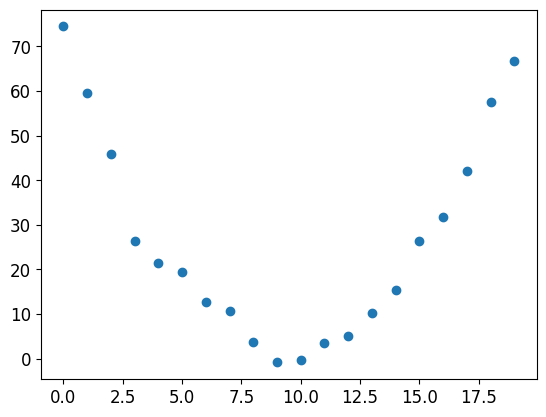

In [45]:
#@ An end to end SGD Example:
time = torch.arange(0, 20).float();
print(time)
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [46]:
## Implementation of SGD
def f(t, params):
  a, b, c = params
  return a*(t**2) + (b*t) + c

def mse(preds, targets):
  return ((preds - targets)**2).mean()

**Step 1**: Initializing the parameters

In [47]:
#@ We initialize the parameters to random values and ask pyTorch to trach gradients

params = torch.randn(3).requires_grad_()
orig_params = params.clone()

**Step 2**: Calculating the predictions:

In [48]:
preds = f(time, params)

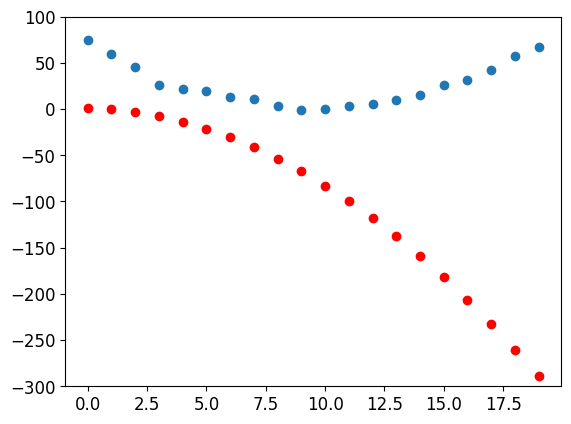

In [49]:
#!! Creating a small function to see how close our predictions are to out tragets

def show_preds(preds, ax= None):
  if ax is None:
    ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

show_preds(preds)

And this doesnot look any close.

**Step 3**: Calculating the Loss

In [50]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

**Step 4:** Calculating the gradients

In [51]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [52]:
params.grad * 1e-5 ## Multiplying by 0.00001 which is supposed to be the learning rate

tensor([-0.5320, -0.0342, -0.0025])

**Step 5**: Stepping the weights

In [53]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

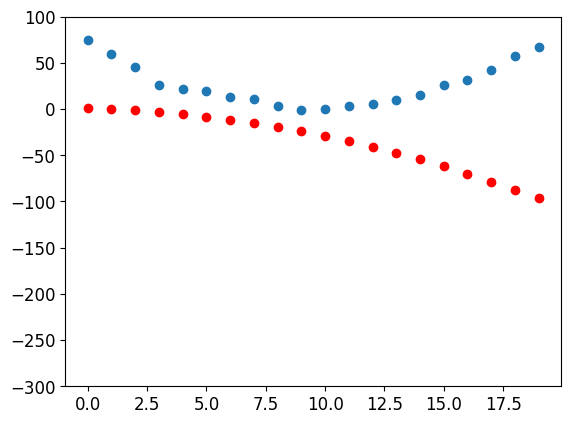

In [54]:
#@ Checking if the loss has improved:
preds = f(time, params)
mse(preds, speed)

show_preds(preds)

And infact it has decreased quite a bit

**Step 6**: Repeating the process

In [55]:
## Defining the function that applies steps

def apply_steps(params, prn= True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

#@ Implementation of the function
for i in range(10):
  apply_steps(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


The loss is now going down over the iterations.

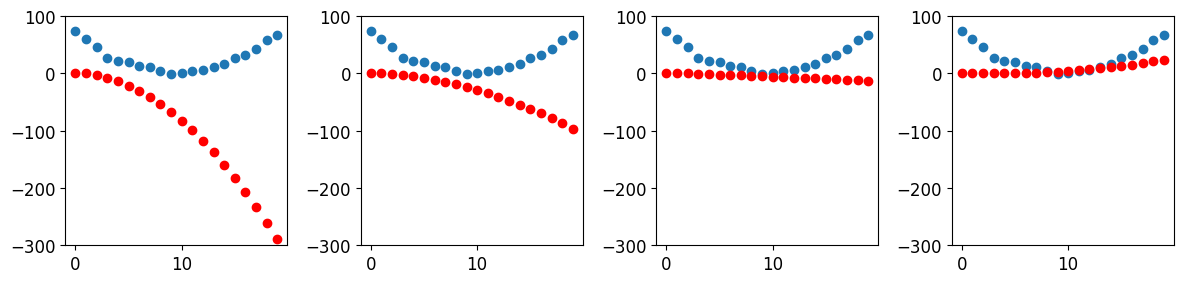

In [56]:
#@ Now visualizing this:
params = orig_params.detach().requires_grad_()
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_steps(params, False), ax)
plt.tight_layout()

**Step 7**: Stopping

###### Summarizing Gradient Descent

1. Model Initialization:

  - Weights can be random (training from scratch) or pretrained (transfer learning).
  - Random weights may not yield useful outputs initially; pretrained weights may still need adjustment.
2. Learning Process:

  - Compare model outputs to target labels using a loss function.
  - The goal is to minimize the loss value.
3. Training Steps:

  - Feed a batch of training data to the model.
  - Compute the loss to assess prediction accuracy.
4. Weight Adjustment:

  - Use gradients (calculated via calculus or frameworks like PyTorch) to determine weight updates.
  - Analogy: Finding the lowest point in a mountainous area by going downhill.
5. Gradient Descent:

  - Move in the direction of the steepest descent using the gradient.
  - The learning rate controls the size of each step.
  - Iterate until the minimum loss is reached.
6. Application to MNIST:

  - The same principles apply when training on the MNIST dataset, with a focus on defining a suitable loss function.

### MNIST Loss Function

#### Creating Training Dataset:

Concatinating all the xs *(Images)* into a single tensor, and changing them from a list of matrices *(rank_3 tensor)* to vector *(rank_2 tensor)*.  

In [57]:
### We can accomplish that using the view
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)  #Initializing concatenation

<details>
    <summary><b>More on .view()</b> </summary>
<ul>The .view() method in PyTorch chnages the shape of a tensor without changing its contents.</ul>
<ul>Here, -1 is the special parameter to view that means <i>"make this axis as big as necessary to fill all the data"</i></ul>
</details>


In [58]:
#@ Now labelling each image. Will use 1 for 3s and 0 for 7s

train_y = tensor([1]*len(three) + [0]*len(seven)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A dataset in PyTorch is required to return a tuple of *(x, y)* when indexed. It can be accomplished using the ***zip*** function.

In [59]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [60]:
##@ Now repeating the same for validation part
valid_x = torch.cat([valid_3_tnsr, valid_7_tnsr]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tnsr) + [0]*len(valid_7_tnsr)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [61]:
##@ Now time to initialize our seven step process.
###! But before that, we need an (initially random) weight for every pixel:

def init_params(size, std= 1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))

The function ``` weights * pixels ``` won't be flexible enough -- ie., it will always be ```0``` when the pixels are equal to ```0```.

---
We know: $y= w\times x + b$ <br>
  Where, w is the weight and b is bias. We still need the bias component.


In [62]:
bias = init_params(1)

In [63]:
#@ Inspecting the predictions:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

**Predictions on Loop and its complexity**

---
We could use the above expression on loop and calculate the predictions for every images, but that would be very slow since python is a slow language. <br>

However, there is an extremely convenient operation that calulates the $w \times x$ for every row of the matrix — called as matrix multiplication.

In [64]:
## Now performing the matrix multiplication

def linear1(xb):
  return xb @ weights + bias    #The @ operator performs the matrix multiplication

preds= linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [65]:
##@ Checking the accuracies
'''
  To decide if an output represents 3 or 7, we can just check whether it's greater than 0
'''

corrects = (preds>0.0).float() == train_y
print(corrects)
print(corrects.float().mean().item())

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])
0.4912068545818329


In [66]:
### Testing the accuracy after tweaking the weight
weights = weights.clone()       #Can't change the main weights directly without making a clone
weights[0] *= 1.00001

preds= linear1(train_x)
corrects = (preds>0.0).float() == train_y
print(corrects.float().mean().item())

0.4912068545818329


In [67]:
##@ Definig Loss Function
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean() #Return the distance(loss) if target == 1 and just predictions otherwise

In [68]:
###@ Inspecting how torch.where works:
trgts = tensor([1,1,0])
prds = tensor([0.5, 0.1, 0.4])

torch.where(trgts==1, 1-prds, prds)

tensor([0.5000, 0.9000, 0.4000])

So yeah it works exactly how I explained in the comment before


In [69]:
mnist_loss(prds, trgts)

tensor(0.6000)

### Sigmoid

So, before we dive into the code section, let's understand a bit about the sigmoid function:<br><br>
*formula:* $$S(x) = \frac {1} {1+ e^{-x}}$$

It outputs a number between 0 and 1. It is a non-linear function which deep learning models use a lot.

In [70]:
#@ defining the sigmoid function in code:
def sigmoid(x):
  return 1/(1+ torch.exp(-x))

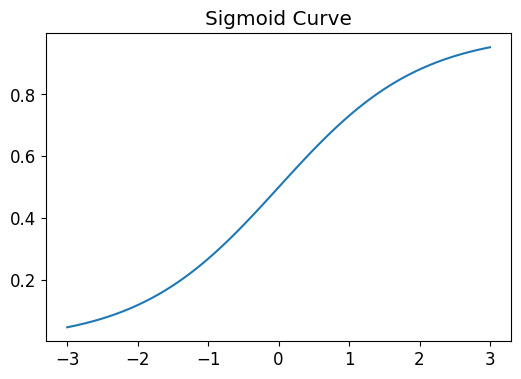

In [71]:
##@ Plotting the curve
plot_function(torch.sigmoid, title= "Sigmoid Curve", min = -3, max= 3)

In [72]:
##@ Updating the loss function to apply sigmoid
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1- predictions, predictions).mean()

<details>
  <summary>
    What does sigmoid do here?
  </summary>
  For any negative values of predictions, all prediction values get squashed between 0 and 1.
</details>

### SGD and Minibatches

**Introduction to Optimization Steps in SGD**

---

In deep learning, an **optimization step** refers to adjusting the model's weights based on gradients calculated from a loss function. The objective is to minimize this loss, allowing the model to make more accurate predictions.

In **Stochastic Gradient Descent (SGD)**, we repeat these optimization steps to adjust the model’s predictions closer to the desired outputs.



<details>
  <summary><strong>Components of an Optimization Step:</strong></summary>

  - **Calculating the loss**: The error between the model’s predictions and the true values.
  - **Determining the gradients**: Finding the direction to adjust weights to reduce loss.
  - **Adjusting weights**: Using gradients to update weights, improving model performance gradually.

</details>

**Calculating Loss with Mini-Batches**

---

To compute the loss, there are different options:

  - **Full Dataset**: Accurate gradients but computationally expensive.
  - **Single Data Item**: Quick but less stable and precise.
  - **Mini-Batches**: A middle ground, providing stable gradients with efficient computation.

**Choosing the Batch Size**

---

The *batch size* impacts training stability and efficiency

<details>
  <summary><strong>Batch size effects:</strong></summary>

  - **Larger Batch Sizes**: More accurate and stable gradients, but require more memory and computation time.
  - **Smaller Batch Sizes**: Faster but may result in noisier, less stable gradients.

</details>

**Why Use Mini-Batches?**

Mini-batches offer several benefits:

1. **Efficiency with Accelerators**: Ideal for GPUs which perform best with multiple data items.
2. **Memory Constraints**: Manages memory efficiently, avoiding overload.
3. **Generalization**: Shuffling mini-batches every epoch improves model generalization by varying data seen per batch.

<<<<
**Using DataLoaders in PyTorch**

---

In PyTorch, `DataLoader` handles mini-batch creation and data shuffling, <simplifying training with mini-batches.

Here’s an example:

In [73]:
coll = range(15)
dl = DataLoader(coll, batch_size=4, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10]),
 tensor([2, 9, 4, 7]),
 tensor([14,  5,  1, 13]),
 tensor([ 0,  6, 11])]

**Using Datasets and DataLoaders with Independent and Dependent Variables**

---

When training a model, we need both **independent** (input) and **dependent** (target) variables. In PyTorch, we use a `Dataset` to structure these pairs, which the `DataLoader` then batches.

*A collection that contains the tuples of independent and dependent variables is known in PyTorch as a Dataset.*

Example:

In [74]:
 #@ Creating a simple Dataset with indexed characters
 ds = L(enumerate(string.ascii_lowercase))        # Here L is the class in PyTorch which converts tuples to datasets
 ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [75]:
#@ Initializing DataLoader for the Dataset
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

### Putting It All Together

Combining everything we’ve learned about using **mini-batches** and **optimization steps** in **Stochastic Gradient Descent (SGD)** to train a digit classifier. Here, we implement the full training loop in PyTorch, including data batching, gradient calculation, and accuracy evaluation.

**Step 1: Initializing Model Parameters**

---

First, we initialize the model parameters: **weights** and **biases**.

In [76]:
 weights = init_params((28*28,1))
 bias = init_params(1)

**Step 2: Creating DataLoader for Training and Validation**

---

Using PyTorch's `DataLoader` for batching and shuffling our training and validation datasets.

In [77]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)                 ## Getting First Elements
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [78]:
#@ Doing the same for validation sets
valid_dl = DataLoader(valid_dset, batch_size=256)
v_xb, v_yb = first(valid_dl)
v_xb.shape, v_yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

**Step 3: Testing with a Mini-Batch**

---

To test the setup, let’s take a small mini-batch and calculate predictions.

In [79]:
#@ Creating a minibatch of size 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [80]:
#@ Getting  the predictions:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [81]:
#@ Getting Loss:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [82]:
#@ Now calculating the gradients:
loss.backward(retain_graph=True)                 ## Backprop
weights.grad.shape, weights.grad.mean(), bias.grad        ## Inspecting the gradients

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [83]:
## Now putting this all in function and testing again:
def calc_gradient(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [84]:
##@@ Testing:
calc_gradient(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [85]:
##@@ Running the same code second time:
calc_gradient(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0182), tensor([-0.1260]))

We got different gradient! And it is due to the **accumulation behavior**.

<details>
  <summary><strong>Explanation of the Accumulation Behavior:</strong></summary>
  <ul>
    <li>
      The <code>.grad</code> attributes accumulate gradients every time <code>loss.backward()</code> is called. If we don’t reset the gradients between calls, they will sum up, which may distort the updates during optimization.
    </li>
    <li>
      In the example above, calling <code>calc_grad</code> again adds new gradients to the existing values in <code>weights.grad</code> and <code>bias.grad</code>. This means that the gradients after the second call include contributions from both forward passes.
    </li>
  </ul>
</details>

In [86]:
'''
Clearing the Gradients:
To avoid unintended accumulation, we clear the gradients before each new batch with .zero_()
'''
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

<details>
  <summary>
    <b>More on <code>.zero_()</code></b>
  </summary>
<ul>
    <li>
      <code>.zero_()</code>resets each parameter’s gradient to zero, ensuring that every time <code>calc_grad</code> runs, it only accumulates gradients from the current batch.
    </li>
    <li>
      The underscore at the end (as in <code>.zero_()</code>) indicates an in-place operation in PyTorch, which directly modifies the tensor.
    </li>
  </ul>
</details>

In [87]:
##@ Now initializing the basic training loop
def train_epoch(model, lr, prams):
  for xb, yb in dl:
    calc_gradient(xb, yb, model)
    for p in prams:
      p.data -= p.grad*lr
      p.grad.zero_()

In [88]:
##@ Defining the function for accuracy
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct= (preds > 0.5) == yb
  return correct.float().mean()

In [89]:
##@ Implementation part:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [90]:
#@ Putting the batches together:
def validate_epoch(model):
  acc= [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(acc).mean().item(), 4)  # average accuracy rounded up to 4 decimal values after stacking into single tensor

validate_epoch(linear1)

0.5263

And, its the starting point. Now, we train for one epoch and see if the accuracy improves.

In [91]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6663

Yup it increased the accuracy. Now we do for a few more:

In [92]:
for i in range(15):
  train_epoch(linear1, lr, params)
  print(f"Epoch{i+1}: {validate_epoch(linear1)}")

Epoch1: 0.8265
Epoch2: 0.89
Epoch3: 0.9183
Epoch4: 0.9276
Epoch5: 0.9398
Epoch6: 0.9466
Epoch7: 0.9505
Epoch8: 0.9525
Epoch9: 0.9559
Epoch10: 0.9579
Epoch11: 0.9598
Epoch12: 0.9608
Epoch13: 0.9613
Epoch14: 0.9618
Epoch15: 0.9633


### Creating an Optimizer:

As models get more complex, managing parameters and gradients manually becomes unpractical.

* PyTorch provides several tools and classes to simplify this process, starting
with ```nn.Linear()```.

* ```nn.Linear``` is PyTorch's module.
* A module is an object of class that inherits from ```nn.Module``` class.

In [93]:
## Initializing our linear model using PyTorch

linear_model = nn.Linear(28*28,1)

##! Inspecting the parameters:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [94]:
##@ So using all these concepts to create the optimizer:
class BasicOptim:
  def __init__(self, params, lr):   #Initializing the optimizer with parmeters and learning rate
    self.params, self.lr= list(params), lr

  def step(self, *args, **kwargs):  #Updates the model paramters based on the gradients and the learning rate
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):   #Resets the gradients of all parameters to zero
    for p in self.params:
      p.grad = None

optim= BasicOptim(linear_model.parameters(), lr)

<details>
  <summary>
    <b>
      More on <code>*args</code> and <code>**kwargs</code>:
    </b>
  </summary>
<ul>
  <li>
    <code>*args</code>: This allows the method to accept any number of positional arguments. It's useful when we want to pass a variable number of arguments to a function/method.
  </li>
  <li>
    <code>**kwargs</code>: This allows the method to accept any number of additional keyword arguments. It's useful when we want to pass a variable number of keyword arguments to a function/method.
  </li>
</ul>
</details>

In [95]:
## Now defining the trainig loop:
def train_epoch(model):
  for xb, yb in dl:
    calc_gradient(xb, yb, model)
    optim.step()
    optim.zero_grad()

In [96]:
## Inspecting the validation function
validate_epoch(linear_model)

0.588

In [97]:
#@ Training loop in action
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(f"In Epoch{i+1}: {validate_epoch(model)}")

train_model(linear_model, 15)

In Epoch1: 0.4932
In Epoch2: 0.7734
In Epoch3: 0.856
In Epoch4: 0.9175
In Epoch5: 0.935
In Epoch6: 0.9487
In Epoch7: 0.956
In Epoch8: 0.9638
In Epoch9: 0.9658
In Epoch10: 0.9678
In Epoch11: 0.9697
In Epoch12: 0.9726
In Epoch13: 0.9736
In Epoch14: 0.9751
In Epoch15: 0.9756


And we got a fair accuracy.


### The FasiAi Methods

In [98]:
linear_model = nn.Linear(28*28,1)

In [99]:
optim = SGD(linear_model.parameters(), lr)  #The SGD class in fastai just did the operation of BasicOptim class that we created before
train_model(linear_model, 15)

In Epoch1: 0.4932
In Epoch2: 0.831
In Epoch3: 0.8433
In Epoch4: 0.9131
In Epoch5: 0.9331
In Epoch6: 0.9463
In Epoch7: 0.956
In Epoch8: 0.9624
In Epoch9: 0.9653
In Epoch10: 0.9668
In Epoch11: 0.9702
In Epoch12: 0.9717
In Epoch13: 0.9736
In Epoch14: 0.9746
In Epoch15: 0.9761


Likewise fastai also provides ```Learner.fit``` which can be used instead of ```train_model```.

To create a **Learner**, we first need to create a DataLoader

In [100]:
##@ Creating the dataloader
dls = DataLoaders(dl, valid_dl)

In [101]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func= SGD, loss_func=mnist_loss, metrics=batch_accuracy)

##! Now fitting:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637069,0.503407,0.495584,00:00
1,0.502409,0.194547,0.833170,00:00
2,0.185145,0.176434,0.842002,00:00
3,0.081485,0.105122,0.912169,00:00
4,0.043311,0.077134,0.932777,00:00
5,0.028424,0.061939,0.947988,00:00
6,0.022307,0.052430,0.955348,00:00
7,0.019583,0.046090,0.961727,00:00
8,0.018197,0.041635,0.966143,00:00
9,0.017362,0.038353,0.967125,00:00


### Adding Non-Linearity

#### Transitioning form Linear classifiers to Neural Networks

1. **Current Approach Review:**

---
<ul>
  <li>
    We've established a procedure to optimize parameters of  the function.
  </li>
  <li>
    So far, we tested this with a <b>simple linear classifier</b>, which, while functional is limited.
  </li>
</ul>

2. Why Linear Classifiers fall short:
---
* Linear classifiers are constrained and can only handle basic tasks.
* They use a function of the form $ax+b$, which restricts their complexity  

3. Introducing Nonlinearity for Complexity:
---
* To model more complex relationships, we need something nonlinear *(not just $ax+b$).*
* Adding a nonlinear function between linear layers creates a neural network, which can model intricate patterns.

In [102]:
#@ Building a basic Neural Network

def simple_net(xb):
  res = xb@w1 + b1                # The first linear transformation
  res = res.max(tensor(0.0))      # Non linear activation funciton
  res = res@w2 + b2               # Second linear trasformation
  return res

In [103]:
#@ Initializing the parameters:
w1 = init_params((28*28,1))
b1 = init_params(30)
w2 = init_params((30, 1))
b2= init_params(1)